<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_Profile_Photos/blob/main/Sentiment_Smile_IVY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Information about vadar sentiment
# https://github.com/cjhutto/vaderSentiment

In [2]:
! pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 785.0 kB/s eta 0:00:00


# Columbia University

In [1]:
import pandas as pd

df_columbia = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_Columbia_Smile.csv")

df_columbia.head(3)

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile
0,Columbia,Ann Bartel,Economics Division,Full,Female,Merrill Lynch Professor of Workforce Transform...,['she'],https://business.columbia.edu/faculty/people/a...,1,0
1,Columbia,Laura Boudreau,Economics Division,Assistant,Female,Assistant Professor of Business,"['she', 'her']",https://business.columbia.edu/faculty/people/l...,1,1
2,Columbia,Abby Cohen,Economics Division,Full,Female,Professor of Business,[],https://business.columbia.edu/faculty/people/a...,1,1


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Text
prof_texts = []

# Iterrow dataframe
for index, row in df_columbia.iterrows():
    name = row['Name']
    url = row['URL']

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract Text
    prof_text = soup.find("div", class_="o-profile__content").get_text().strip()
    prof_texts.append(prof_text)

df_columbia['prof_text'] = prof_texts

df_columbia.head(3)

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text
0,Columbia,Ann Bartel,Economics Division,Full,Female,Merrill Lynch Professor of Workforce Transform...,['she'],https://business.columbia.edu/faculty/people/a...,1,0,Professor Bartel is the Merrill Lynch Professo...
1,Columbia,Laura Boudreau,Economics Division,Assistant,Female,Assistant Professor of Business,"['she', 'her']",https://business.columbia.edu/faculty/people/l...,1,1,Laura Boudreau is an Assistant Director at Col...
2,Columbia,Abby Cohen,Economics Division,Full,Female,Professor of Business,[],https://business.columbia.edu/faculty/people/a...,1,1,


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# empty list
sentiment_scores = []
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

# Iteraate and get score
for index, row in df_columbia.iterrows():
    url = row["URL"]
    text = row["prof_text"]
    vs = analyzer.polarity_scores(text)
    sentiment_scores.append(vs["compound"])
    positive_sentiments.append(vs["pos"])
    negative_sentiments.append(vs["neg"])
    neutral_sentiments.append(vs["neu"])

    print(url, vs)

df_columbia["sentiment"] = sentiment_scores
df_columbia["positive"] = positive_sentiments
df_columbia["negative"] =negative_sentiments
df_columbia["neutral"] = neutral_sentiments

https://business.columbia.edu/faculty/people/ann-bartel {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.9371}
https://business.columbia.edu/faculty/people/laura-boudreau {'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'compound': 0.4576}
https://business.columbia.edu/faculty/people/abby-cohen {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
https://business.columbia.edu/faculty/people/wouter-dessein {'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'compound': 0.8519}
https://business.columbia.edu/faculty/people/laura-doval {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
https://business.columbia.edu/faculty/people/frank-lichtenberg {'neg': 0.029, 'neu': 0.872, 'pos': 0.1, 'compound': 0.98}
https://business.columbia.edu/faculty/people/frederic-mishkin {'neg': 0.011, 'neu': 0.943, 'pos': 0.046, 'compound': 0.9423}
https://business.columbia.edu/faculty/people/christian-moser {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.9501}
https://business.columbia.edu/faculty/people/cristoba

In [7]:
df_columbia[(df_columbia["positive"] == 0) &(df_columbia["negative"] == 0) & (df_columbia["neutral"] == 0)]

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text,sentiment,positive,negative,neutral
2,Columbia,Abby Cohen,Economics Division,Full,Female,Professor of Business,[],https://business.columbia.edu/faculty/people/a...,1,1,,0.0,0.0,0.0,0.0
17,Columbia,Conor Walsh,Economics Division,Assistant,Male,Assistant Professor of Business,[],https://business.columbia.edu/faculty/people/c...,1,1,,0.0,0.0,0.0,0.0
91,Columbia,Syrena Shirley,Accounting Division,Assistant,Female,Assistant Professor of Business,[],https://business.columbia.edu/faculty/people/s...,1,1,,0.0,0.0,0.0,0.0
100,Columbia,Xuelin Li,Finance Division,Assistant,Male,Assistant Professor of Business,[],https://business.columbia.edu/faculty/people/x...,1,0,,0.0,0.0,0.0,0.0


In [8]:
df_columbia[df_columbia[['positive', 'negative', 'neutral']].eq(0).all(axis=1)]

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text,sentiment,positive,negative,neutral
2,Columbia,Abby Cohen,Economics Division,Full,Female,Professor of Business,[],https://business.columbia.edu/faculty/people/a...,1,1,,0.0,0.0,0.0,0.0
17,Columbia,Conor Walsh,Economics Division,Assistant,Male,Assistant Professor of Business,[],https://business.columbia.edu/faculty/people/c...,1,1,,0.0,0.0,0.0,0.0
91,Columbia,Syrena Shirley,Accounting Division,Assistant,Female,Assistant Professor of Business,[],https://business.columbia.edu/faculty/people/s...,1,1,,0.0,0.0,0.0,0.0
100,Columbia,Xuelin Li,Finance Division,Assistant,Male,Assistant Professor of Business,[],https://business.columbia.edu/faculty/people/x...,1,0,,0.0,0.0,0.0,0.0


In [14]:
names_to_remove = ["Abby Cohen", "Conor Walsh", "Syrena Shirley", "Xuelin Li"]
df_columbia_new = df_columbia[~df_columbia["Name"].isin(names_to_remove)]

In [17]:
df_columbia_new[df_columbia_new["Name"].str.contains("Abby")]

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text,sentiment,positive,negative,neutral


In [15]:
print(df_columbia.info())
print(df_columbia_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   University  113 non-null    object 
 1   Name        113 non-null    object 
 2   Department  113 non-null    object 
 3   Rank        113 non-null    object 
 4   Sex         113 non-null    object 
 5   Title       113 non-null    object 
 6   Pronouns    113 non-null    object 
 7   URL         113 non-null    object 
 8   Face        113 non-null    int64  
 9   Smile       113 non-null    int64  
 10  prof_text   113 non-null    object 
 11  sentiment   113 non-null    float64
 12  positive    113 non-null    float64
 13  negative    113 non-null    float64
 14  neutral     113 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 13.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 112
Data columns (total 15 columns):
 #   Column      Non-Null

# Cornell

In [18]:
import pandas as pd

df_cornell = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_Cornell_Smile.csv")

In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Text
prof_texts = []

# Iterrow dataframe
for index, row in df_cornell.iterrows():
    name = row['Name']
    url = row['URL']

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract Text
    prof_text = soup.find("p", class_="faculty-profile__bio")
    prof_text = prof_text.get_text().strip() if prof_text else None
    prof_texts.append(prof_text)

df_cornell['prof_text'] = prof_texts

df_cornell.head(3)

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text
0,Cornell,Sanjeev Bhojraj,accounting,Full,Male,Alumni Professor in Asset Management\nFaculty ...,"['his', 'he']",https://www.johnson.cornell.edu/faculty-resear...,1,0,Professor Sanjeev Bhojraj is the Alumni Profes...
1,Cornell,Robert J. Bloomfield,accounting,Full,Male,Nicholas H. Noyes Professor of Management\nAre...,['he'],https://www.johnson.cornell.edu/faculty-resear...,1,1,Since coming to the Johnson Graduate School of...
2,Cornell,Nicholas Matthew Guest,accounting,Assistant,Male,Assistant Professor,"['his', 'he']",https://www.johnson.cornell.edu/faculty-resear...,1,1,Professor Nicholas Guest is an assistant profe...


In [26]:
df_cornell[df_cornell["prof_text"].isnull()]

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text
23,Cornell,Elizabeth McClean,management-and-organizations,Associate,Female,Associate Professor,[],https://www.johnson.cornell.edu/faculty-resear...,1,1,None
34,Cornell,Omid Rafieian,marketing,Assistant,Male,Assistant Professor\nDemir Sabanci Faculty Fel...,[],https://www.johnson.cornell.edu/faculty-resear...,1,1,None
45,Cornell,Yichun Hu,operations-technology-information-management,Assistant,Female,Assistant Professor,[],https://business.cornell.edu/faculty-research/...,1,1,None
46,Cornell,Nur Kaynar,operations-technology-information-management,Assistant,Female,Assistant Professor,[],https://www.johnson.cornell.edu/faculty-resear...,1,0,None


In [30]:
df_cornell_new = df_cornell[~df_cornell["prof_text"].isnull()]

print(df_cornell.info())
print(df_cornell_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  53 non-null     object
 1   Name        53 non-null     object
 2   Department  53 non-null     object
 3   Rank        53 non-null     object
 4   Sex         53 non-null     object
 5   Title       53 non-null     object
 6   Pronouns    53 non-null     object
 7   URL         53 non-null     object
 8   Face        53 non-null     int64 
 9   Smile       53 non-null     int64 
 10  prof_text   49 non-null     object
dtypes: int64(2), object(9)
memory usage: 4.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 52
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  49 non-null     object
 1   Name        49 non-null     object
 2   Department  49 non-null     object
 3   Rank        49

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# empty list
sentiment_scores = []
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

# Iteraate and get score
for index, row in df_cornell_new.iterrows():
    url = row["URL"]
    text = row["prof_text"]
    vs = analyzer.polarity_scores(text)
    sentiment_scores.append(vs["compound"])
    positive_sentiments.append(vs["pos"])
    negative_sentiments.append(vs["neg"])
    neutral_sentiments.append(vs["neu"])

    print(url, vs)

df_cornell_new["sentiment"] = sentiment_scores
df_cornell_new["positive"] = positive_sentiments
df_cornell_new["negative"] =negative_sentiments
df_cornell_new["neutral"] = neutral_sentiments

https://www.johnson.cornell.edu/faculty-research/faculty/sb235/ {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.9776}
https://www.johnson.cornell.edu/faculty-research/faculty/rjb9/ {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.9823}
https://www.johnson.cornell.edu/faculty-research/faculty/nmg75/ {'neg': 0.0, 'neu': 0.959, 'pos': 0.041, 'compound': 0.5849}
https://www.johnson.cornell.edu/faculty-research/faculty/rdg222/ {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.8834}
https://www.johnson.cornell.edu/faculty-research/faculty/rl54/ {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.987}
https://www.johnson.cornell.edu/faculty-research/faculty/yl2269/ {'neg': 0.029, 'neu': 0.942, 'pos': 0.029, 'compound': 0.0}
https://www.johnson.cornell.edu/faculty-research/faculty/mwn2/ {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.9837}
https://www.johnson.cornell.edu/faculty-research/faculty/kmr52/ {'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'compound': 0.7269}
htt

<ipython-input-31-8bdb7ae66b1c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cornell_new["sentiment"] = sentiment_scores
<ipython-input-31-8bdb7ae66b1c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cornell_new["positive"] = positive_sentiments
<ipython-input-31-8bdb7ae66b1c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

# Harvard

In [32]:
import pandas as pd

df_harvard = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_Harvard_Smile.csv")

df_harvard.head()

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile
0,Harvard,Rawi E. Abdelal,"Business, Government and the International Eco...",Full,Male,Herbert F. Johnson Professor of International ...,"['his', 'he']",https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1
1,Harvard,Juan Alcacer,Strategy,Full,Male,James J. Hill Professor of Business Administra...,"['his', 'he']",https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1
2,Harvard,Laura Alfaro,General Management,Full,Female,Warren Alpert Professor of Business Administra...,"['her', 'she']",https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1
3,Harvard,Livia Alfonsi,"Negotiation, Organizations & Markets",Assistant,Female,Assistant Professor of Business Administration,['she'],https://www.hbs.edu/faculty/Pages/profile.aspx...,1,0
4,Harvard,Tomomichi Amano,Marketing,Assistant,Male,Assistant Professor of Business Administration,['he'],https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1


In [33]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Text
prof_texts = []

# Iterrow dataframe
for index, row in df_harvard.iterrows():
    name = row['Name']
    url = row['URL']

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract Text
    prof_text = soup.find("div", class_="fullBio")
    prof_text = prof_text.get_text() if prof_text else None
    prof_texts.append(prof_text)


df_harvard['prof_text'] = prof_texts

df_harvard.head(3)

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text
0,Harvard,Rawi E. Abdelal,"Business, Government and the International Eco...",Full,Male,Herbert F. Johnson Professor of International ...,"['his', 'he']",https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1,Rawi Abdelal is the Herbert F. Johnson Profess...
1,Harvard,Juan Alcacer,Strategy,Full,Male,James J. Hill Professor of Business Administra...,"['his', 'he']",https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1,Juan Alcacer is the James J. Hill Professor of...
2,Harvard,Laura Alfaro,General Management,Full,Female,Warren Alpert Professor of Business Administra...,"['her', 'she']",https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1,Laura Alfaro is the Warren Alpert Professor of...


In [34]:
df_harvard[df_harvard["prof_text"].isnull()]

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text
23,Harvard,Alex Chan,"Negotiation, Organizations & Markets",Assistant,Male,Assistant Professor of Business Administration,[],https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1,None
36,Harvard,Marco Di Maggio,Finance,Associate,Male,Associate Professor of Business Administration,"['his', 'he']",https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1,None
107,Harvard,Michael Lingzhi Li,Technology and Operations Management,Assistant,Male,Assistant Professor of Business Administration,[],https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1,None
117,Harvard,Max J. Miller,Finance,Assistant,Male,Assistant Professor of Business Administration,[],https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1,None
147,Harvard,Natalia Rigol,Entrepreneurial Management,Assistant,Female,Assistant Professor of Business Administration,[],https://www.hbs.edu/faculty/Pages/profile.aspx...,1,1,None


In [35]:
df_harvard_new = df_harvard[~df_harvard["prof_text"].isnull()]

print(df_harvard.info())
print(df_harvard_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  203 non-null    object
 1   Name        203 non-null    object
 2   Department  203 non-null    object
 3   Rank        203 non-null    object
 4   Sex         203 non-null    object
 5   Title       203 non-null    object
 6   Pronouns    203 non-null    object
 7   URL         203 non-null    object
 8   Face        203 non-null    int64 
 9   Smile       203 non-null    int64 
 10  prof_text   198 non-null    object
dtypes: int64(2), object(9)
memory usage: 17.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 202
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  198 non-null    object
 1   Name        198 non-null    object
 2   Department  198 non-null    object
 3   Rank     

In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# empty list
sentiment_scores = []
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

# Iteraate and get score
for index, row in df_harvard_new.iterrows():
    url = row["URL"]
    text = row["prof_text"]
    vs = analyzer.polarity_scores(text)
    sentiment_scores.append(vs["compound"])
    positive_sentiments.append(vs["pos"])
    negative_sentiments.append(vs["neg"])
    neutral_sentiments.append(vs["neu"])

    print(url, vs)

df_harvard_new["sentiment"] = sentiment_scores
df_harvard_new["positive"] = positive_sentiments
df_harvard_new["negative"] =negative_sentiments
df_harvard_new["neutral"] = neutral_sentiments

https://www.hbs.edu/faculty/Pages/profile.aspx?facId=6628 {'neg': 0.026, 'neu': 0.786, 'pos': 0.188, 'compound': 0.9945}
https://www.hbs.edu/faculty/Pages/profile.aspx?facId=178197 {'neg': 0.007, 'neu': 0.888, 'pos': 0.105, 'compound': 0.9846}
https://www.hbs.edu/faculty/Pages/profile.aspx?facId=6629 {'neg': 0.012, 'neu': 0.933, 'pos': 0.056, 'compound': 0.9337}
https://www.hbs.edu/faculty/Pages/profile.aspx?facId=1494418 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
https://www.hbs.edu/faculty/Pages/profile.aspx?facId=938509 {'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.9325}
https://www.hbs.edu/faculty/Pages/profile.aspx?facId=6410 {'neg': 0.012, 'neu': 0.901, 'pos': 0.087, 'compound': 0.9931}
https://www.hbs.edu/faculty/Pages/profile.aspx?facId=1284277 {'neg': 0.017, 'neu': 0.94, 'pos': 0.043, 'compound': 0.4019}
https://www.hbs.edu/faculty/Pages/profile.aspx?facId=548988 {'neg': 0.004, 'neu': 0.819, 'pos': 0.176, 'compound': 0.9974}
https://www.hbs.edu/faculty/Page

<ipython-input-36-1e15109b75c9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_harvard_new["sentiment"] = sentiment_scores
<ipython-input-36-1e15109b75c9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_harvard_new["positive"] = positive_sentiments
<ipython-input-36-1e15109b75c9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

# Yale

In [37]:
import pandas as pd

df_yale = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_Yale_Smile.csv")

print(df_yale.info(), "\n")

df_yale.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  72 non-null     object
 1   Name        72 non-null     object
 2   Department  72 non-null     object
 3   Rank        72 non-null     object
 4   Sex         72 non-null     object
 5   Title       72 non-null     object
 6   Pronouns    72 non-null     object
 7   URL         72 non-null     object
 8   Face        72 non-null     int64 
 9   Smile       72 non-null     int64 
dtypes: int64(2), object(8)
memory usage: 5.8+ KB
None 



,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile
0,Yale,Jason Abaluck,Economics,Full,Male,Professor of Economics,['his'],https://som.yale.edu/faculty-research/faculty-...,1,1
1,Yale,Laura Adler,Organizational Behavior,Assistant,Female,Assistant Professor of Organizational Behavior,"['she', 'her']",https://som.yale.edu/faculty-research/faculty-...,1,1
2,Yale,Rick Antle,Accounting,Full,Male,William S. Beinecke Professor of Accounting,"['his', 'he']",https://som.yale.edu/faculty-research/faculty-...,1,1
3,Yale,David Argente,Economics,Assistant,Male,Assistant Professor of Economics,"['his', 'he']",https://som.yale.edu/faculty-research/faculty-...,1,1
4,Yale,Nicholas C. Barberis,Finance,Full,Male,Stephen and Camille Schramm Professor of Finance,"['his', 'he']",https://som.yale.edu/faculty-research/faculty-...,1,1


In [38]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Text
prof_texts = []

# Iterrow dataframe
for index, row in df_yale.iterrows():
    name = row['Name']
    url = row['URL']

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract Text
    prof_text = soup.find("div", class_="text-long")
    prof_text = prof_text.get_text() if prof_text else None
    prof_texts.append(prof_text)

df_yale['prof_text'] = prof_texts

df_yale.head(3)

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text
0,Yale,Jason Abaluck,Economics,Full,Male,Professor of Economics,['his'],https://som.yale.edu/faculty-research/faculty-...,1,1,Professor Abaluck's work lies at the intersect...
1,Yale,Laura Adler,Organizational Behavior,Assistant,Female,Assistant Professor of Organizational Behavior,"['she', 'her']",https://som.yale.edu/faculty-research/faculty-...,1,1,Laura Adler's research examines topics at the ...
2,Yale,Rick Antle,Accounting,Full,Male,William S. Beinecke Professor of Accounting,"['his', 'he']",https://som.yale.edu/faculty-research/faculty-...,1,1,Rick Antle is the William S. Beinecke Professo...


In [41]:
 df_yale[df_yale["prof_text"].isnull()]

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text


In [43]:
df_yale_new = df_yale[~df_yale["prof_text"].isnull()]

print(df_yale.info())
print(df_yale_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  72 non-null     object
 1   Name        72 non-null     object
 2   Department  72 non-null     object
 3   Rank        72 non-null     object
 4   Sex         72 non-null     object
 5   Title       72 non-null     object
 6   Pronouns    72 non-null     object
 7   URL         72 non-null     object
 8   Face        72 non-null     int64 
 9   Smile       72 non-null     int64 
 10  prof_text   72 non-null     object
dtypes: int64(2), object(9)
memory usage: 6.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  72 non-null     object
 1   Name        72 non-null     object
 2   Department  72 non-null     object
 3   Rank        72

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# empty list
sentiment_scores = []
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

# Iteraate and get score
for index, row in df_yale_new.iterrows():
    url = row["URL"]
    text = row["prof_text"]
    vs = analyzer.polarity_scores(text)
    sentiment_scores.append(vs["compound"])
    positive_sentiments.append(vs["pos"])
    negative_sentiments.append(vs["neg"])
    neutral_sentiments.append(vs["neu"])

    print(url, vs)

df_yale_new["sentiment"] = sentiment_scores
df_yale_new["positive"] = positive_sentiments
df_yale_new["negative"] =negative_sentiments
df_yale_new["neutral"] = neutral_sentiments

https://som.yale.edu/faculty-research/faculty-directory/jason-abaluck {'neg': 0.134, 'neu': 0.81, 'pos': 0.055, 'compound': -0.5574}
https://som.yale.edu/faculty-research/faculty-directory/laura-adler {'neg': 0.018, 'neu': 0.934, 'pos': 0.048, 'compound': 0.7351}
https://som.yale.edu/faculty-research/faculty-directory/rick-antle {'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.8678}
https://som.yale.edu/faculty-research/faculty-directory/david-argente {'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'compound': 0.5574}
https://som.yale.edu/faculty-research/faculty-directory/nicholas-c-barberis {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.8481}
https://som.yale.edu/faculty-research/faculty-directory/james-n-baron {'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.9432}
https://som.yale.edu/faculty-research/faculty-directory/barbara-biasi {'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'compound': 0.5719}
https://som.yale.edu/faculty-research/faculty-directory/tristan-l-botelho {'ne

# Dartmouth

In [44]:
import pandas as pd

df_dartmouth = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Profile_Photos/main/DATA/2024_01_darthmouth_smile.csv")

df_dartmouth

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile
0,Dartmouth,Leslie A. Robinson,accounting,Full,Female,Professor of Business Administration,"['her', 'she']",https://www.tuck.dartmouth.edu/faculty/faculty...,1,1
1,Dartmouth,Richard C. Sansing,accounting,Full,Male,Noble Foundation Professor of Accounting,"['his', 'he']",https://www.tuck.dartmouth.edu/faculty/faculty...,1,1
2,Dartmouth,Phillip C. Stocken,accounting,Full,Male,Jack Byrne Professor of Accounting; Area Chair...,['he'],https://www.tuck.dartmouth.edu/faculty/faculty...,1,1
3,Dartmouth,Andrew B. Bernard,economics,Full,Male,Kadas T'90 Distinguished Professor,"['his', 'he']",https://www.tuck.dartmouth.edu/faculty/faculty...,1,1
4,Dartmouth,Emily J. Blanchard,economics,Associate,Female,Associate Professor of Business Administration,"['her', 'she']",https://www.tuck.dartmouth.edu/faculty/faculty...,1,1
5,Dartmouth,Davin Chor,economics,Associate,Male,Associate Professor and Globalization Chair; H...,[],https://www.tuck.dartmouth.edu/faculty/faculty...,1,1
6,Dartmouth,Teresa Fort,economics,Associate,Female,Associate Professor of Business Administration,['her'],https://www.tuck.dartmouth.edu/faculty/faculty...,1,1
7,Dartmouth,Robert G. Hansen,economics,Full,Male,Norman W. Martin 1925 Professor of Business Ad...,['he'],https://www.tuck.dartmouth.edu/faculty/faculty...,1,1
8,Dartmouth,Erin Mansur,economics,Full,Male,Revers Professor of Business Administration; F...,['he'],https://www.tuck.dartmouth.edu/faculty/faculty...,1,1
9,Dartmouth,Felix Montag,economics,Assistant,Male,Assistant Professor of Business Administration,"['his', 'he']",https://www.tuck.dartmouth.edu/faculty/faculty...,1,1


In [45]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Text
prof_texts = []

# Iterrow dataframe
for index, row in df_dartmouth.iterrows():
    name = row['Name']
    url = row['URL']

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract Text

    div_tag = soup.find("div", class_="large-8 medium-8 columns bio")
    p_tag = div_tag.find("p")

    prof_text = p_tag.get_text()
    prof_text = text.strip() if text else None
    prof_texts.append(prof_text)

df_dartmouth['prof_text'] = prof_texts

df_dartmouth.head(3)

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text
0,Dartmouth,Leslie A. Robinson,accounting,Full,Female,Professor of Business Administration,"['her', 'she']",https://www.tuck.dartmouth.edu/faculty/faculty...,1,1,Tiona Zuzul is an Assistant Professor in the S...
1,Dartmouth,Richard C. Sansing,accounting,Full,Male,Noble Foundation Professor of Accounting,"['his', 'he']",https://www.tuck.dartmouth.edu/faculty/faculty...,1,1,Tiona Zuzul is an Assistant Professor in the S...
2,Dartmouth,Phillip C. Stocken,accounting,Full,Male,Jack Byrne Professor of Accounting; Area Chair...,['he'],https://www.tuck.dartmouth.edu/faculty/faculty...,1,1,Tiona Zuzul is an Assistant Professor in the S...


In [48]:
df_dartmouth[df_dartmouth["prof_text"].isnull()]

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text


In [50]:
df_dartmouth_new = df_dartmouth[~df_dartmouth["prof_text"].isnull()]

print(df_dartmouth.info())
print(df_dartmouth_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  54 non-null     object
 1   Name        54 non-null     object
 2   Department  54 non-null     object
 3   Rank        54 non-null     object
 4   Sex         54 non-null     object
 5   Title       54 non-null     object
 6   Pronouns    54 non-null     object
 7   URL         54 non-null     object
 8   Face        54 non-null     int64 
 9   Smile       54 non-null     int64 
 10  prof_text   54 non-null     object
dtypes: int64(2), object(9)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  54 non-null     object
 1   Name        54 non-null     object
 2   Department  54 non-null     object
 3   Rank        54

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# empty list
sentiment_scores = []
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

# Iteraate and get score
for index, row in df_dartmouth_new.iterrows():
    url = row["URL"]
    text = row["prof_text"]
    vs = analyzer.polarity_scores(text)
    sentiment_scores.append(vs["compound"])
    positive_sentiments.append(vs["pos"])
    negative_sentiments.append(vs["neg"])
    neutral_sentiments.append(vs["neu"])

    print(url, vs)

df_dartmouth_new["sentiment"] = sentiment_scores
df_dartmouth_new["positive"] = positive_sentiments
df_dartmouth_new["negative"] =negative_sentiments
df_dartmouth_new["neutral"] = neutral_sentiments

https://www.tuck.dartmouth.edu/faculty/faculty-directory/leslie-a-robinson {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.9612}
https://www.tuck.dartmouth.edu/faculty/faculty-directory/richard-c-sansing {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.9612}
https://www.tuck.dartmouth.edu/faculty/faculty-directory/phillip-c-stocken {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.9612}
https://www.tuck.dartmouth.edu/faculty/faculty-directory/andrew-b-bernard {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.9612}
https://www.tuck.dartmouth.edu/faculty/faculty-directory/emily-j-blanchard {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.9612}
https://www.tuck.dartmouth.edu/faculty/faculty-directory/davin-chor {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.9612}
https://www.tuck.dartmouth.edu/faculty/faculty-directory/teresa-fort {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.9612}
https://www.tuck.dartmouth.edu/faculty/faculty-directory/rober

# Merge the datasets

In [59]:
print(df_columbia_new.info(), "\n")
print(df_cornell_new.info(), "\n")
print(df_dartmouth_new.info(), "\n")
print(df_harvard_new.info(), "\n")
print(df_yale_new.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 112
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   University  109 non-null    object 
 1   Name        109 non-null    object 
 2   Department  109 non-null    object 
 3   Rank        109 non-null    object 
 4   Sex         109 non-null    object 
 5   Title       109 non-null    object 
 6   Pronouns    109 non-null    object 
 7   URL         109 non-null    object 
 8   Face        109 non-null    int64  
 9   Smile       109 non-null    int64  
 10  prof_text   109 non-null    object 
 11  sentiment   109 non-null    float64
 12  positive    109 non-null    float64
 13  negative    109 non-null    float64
 14  neutral     109 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 13.6+ KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 52
Data columns (total 15 columns):
 #   Column      Non-Null

In [60]:
df_total = pd.concat([df_columbia_new, df_cornell_new, df_dartmouth_new, df_harvard_new, df_yale_new], ignore_index=True)

In [61]:
df_total.head(3)

,University,Name,Department,Rank,Sex,Title,Pronouns,URL,Face,Smile,prof_text,sentiment,positive,negative,neutral
0,Columbia,Ann Bartel,Economics Division,Full,Female,Merrill Lynch Professor of Workforce Transform...,['she'],https://business.columbia.edu/faculty/people/a...,1,0,Professor Bartel is the Merrill Lynch Professo...,0.9371,0.104,0.0,0.896
1,Columbia,Laura Boudreau,Economics Division,Assistant,Female,Assistant Professor of Business,"['she', 'her']",https://business.columbia.edu/faculty/people/l...,1,1,Laura Boudreau is an Assistant Director at Col...,0.4576,0.053,0.0,0.947
2,Columbia,Wouter Dessein,Economics Division,Full,Male,Eli Ginzberg Professor of Finance and Economics,"['he', 'his']",https://business.columbia.edu/faculty/people/w...,1,0,Wouter Dessein is the Eli Ginzberg Professor o...,0.8519,0.046,0.0,0.954


In [62]:
import pandas as pd

df_total.to_csv("df_smile_sentiment.csv", index=False)

# Statistical Test

In [85]:
# ANOVA for smile and sentiment

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("Smile")
model = ols('Smile ~ C(Rank)', data=df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

print("Sentiment")
model = ols('sentiment ~ C(Rank)', data=df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

Smile
             sum_sq     df         F    PR(>F)
C(Rank)    1.242301    2.0  3.467929  0.031967
Residual  85.795043  479.0       NaN       NaN



Sentiment
             sum_sq     df          F        PR(>F)
C(Rank)    4.862540    2.0  17.472602  4.739991e-08
Residual  66.651677  479.0        NaN           NaN





In [89]:
# T test for sentiment and smile

print("Sentiment")
group1 = df_total[df_total['Sex'] == 'Female']['sentiment']
group2 = df_total[df_total['Sex'] == 'Male']['sentiment']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("\n\n")

print("Smile")
group1 = df_total[df_total['Sex'] == 'Female']['Smile']
group2 = df_total[df_total['Sex'] == 'Male']['Smile']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("\n\n")

df_total.groupby("Sex")[["Smile", "sentiment"]].mean().reset_index()

Sentiment
T-Statistic: -0.6185814525632279
P-Value: 0.5366840176435017



Smile
T-Statistic: 3.9633616844086954
P-Value: 8.877124663592243e-05





,Sex,Smile,sentiment
0,Female,0.865772,0.723117
1,Male,0.717718,0.746586


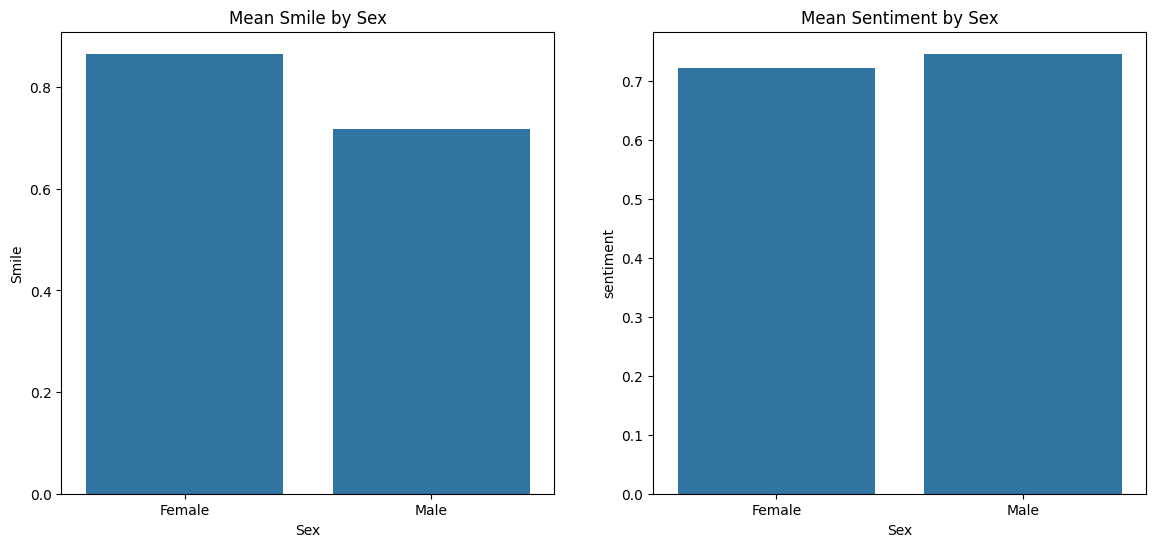

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by "Sex" and calculate the mean for "Smile" and "sentiment"
grouped_data = df_total.groupby("Sex")[["Smile", "sentiment"]].mean().reset_index()

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for "Smile"
sns.barplot(x="Sex", y="Smile", data=grouped_data, ax=axes[0])
axes[0].set_title("Mean Smile by Sex")

# Plot for "sentiment"
sns.barplot(x="Sex", y="sentiment", data=grouped_data, ax=axes[1])
axes[1].set_title("Mean Sentiment by Sex")

plt.show()

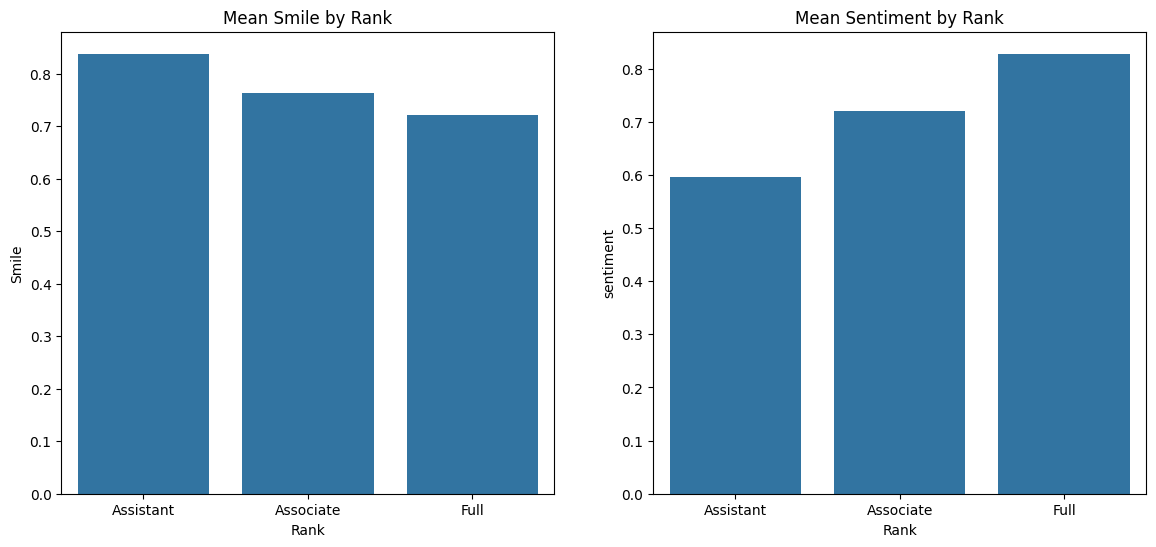

In [95]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
order = ["Assistant", "Associate", "Full"]

sns.barplot(
    data=df_total,
    x="Rank",
    y="Smile",
    order = order,
    errorbar = None,
    ax = axes[0])
axes[0].set_title("Mean Smile by Rank")

sns.barplot(
    data=df_total,
    x="Rank",
    y="sentiment",
    order = order,
    errorbar = None,
    ax = axes[1])
axes[1].set_title("Mean Sentiment by Rank")

plt.show()

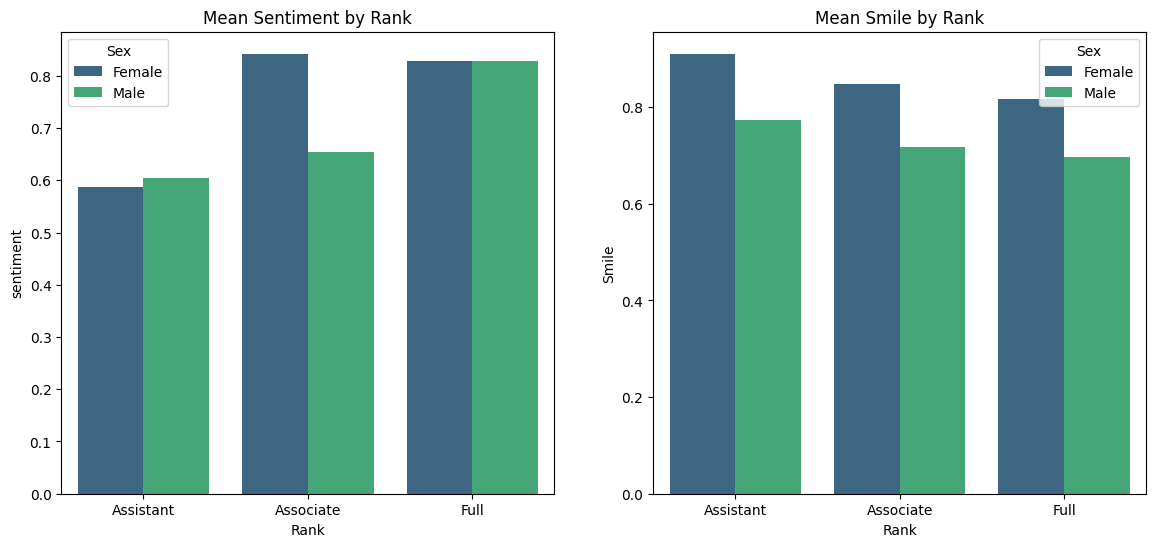

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

grouped_data = df_total.groupby(["Sex", "Rank"])[["sentiment", "Smile"]].mean().reset_index()

# Create a bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Rank", y="sentiment", hue="Sex", data=grouped_data, palette="viridis", ax = axes[0])
axes[0].set_title("Mean Sentiment by Rank")

plt.figure(figsize=(10, 6))
sns.barplot(x="Rank", y="Smile", hue="Sex", data=grouped_data, palette="viridis", ax = axes[1])
axes[1].set_title("Mean Smile by Rank")

# Show the plot
plt.show()

In [63]:
# ANOVA Test for Rank

# ANOVA and TukeyHSD result

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('sentiment ~ C(Rank)', data=df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df_total["sentiment"], df_total['Rank'])
print(tukey_results)
print("\n")

# Print the p-values
print(f"Tukey's HSD P-Values: {[round(p, 5) for p in tukey_results.pvalues]}")


             sum_sq     df          F        PR(>F)
C(Rank)    4.862540    2.0  17.472602  4.739991e-08
Residual  66.651677  479.0        NaN           NaN



  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower  upper  reject
--------------------------------------------------------
Assistant Associate   0.1239  0.035 0.0069 0.2409   True
Assistant      Full   0.2313    0.0 0.1389 0.3236   True
Associate      Full   0.1074 0.0481 0.0007 0.2141   True
--------------------------------------------------------


Tukey's HSD P-Values: [0.035, 0.0, 0.04808]


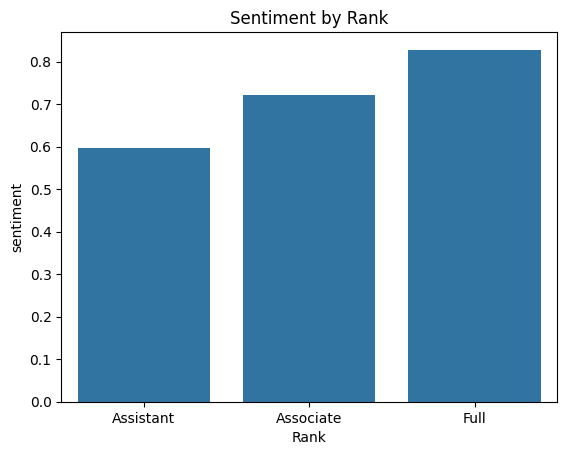

In [80]:
# ANOVA Graph

import matplotlib.pyplot as plt
import seaborn as sns

order = ["Assistant", "Associate", "Full"]

sns.barplot(
    data=df_total,
    x="Rank",
    y="sentiment",
    order = order,
    errorbar = None)

plt.title("Sentiment by Rank")
plt.show()

             sum_sq     df         F    PR(>F)
C(Rank)    1.242301    2.0  3.467929  0.031967
Residual  85.795043  479.0       NaN       NaN



   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Assistant Associate  -0.0746 0.3841 -0.2073  0.0581  False
Assistant      Full  -0.1174 0.0237 -0.2222 -0.0126   True
Associate      Full  -0.0428 0.6839 -0.1638  0.0783  False
----------------------------------------------------------


Tukey's HSD P-Values: [0.38407, 0.02366, 0.68388]


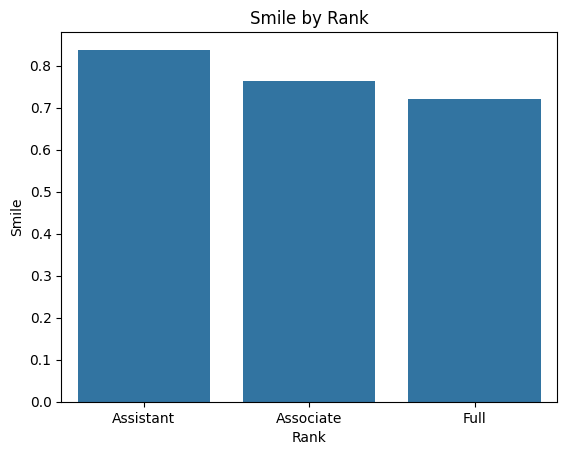

In [79]:
# ANOVA Test for Rank

# ANOVA and TukeyHSD result

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('Smile ~ C(Rank)', data=df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df_total["Smile"], df_total['Rank'])
print(tukey_results)
print("\n")

# Print the p-values
print(f"Tukey's HSD P-Values: {[round(p, 5) for p in tukey_results.pvalues]}")

import matplotlib.pyplot as plt
import seaborn as sns

order = ["Assistant", "Associate", "Full"]

sns.barplot(
    data=df_total,
    x="Rank",
    y="Smile",
    order = order,
    errorbar = None)

plt.title("Smile by Rank")
plt.show()

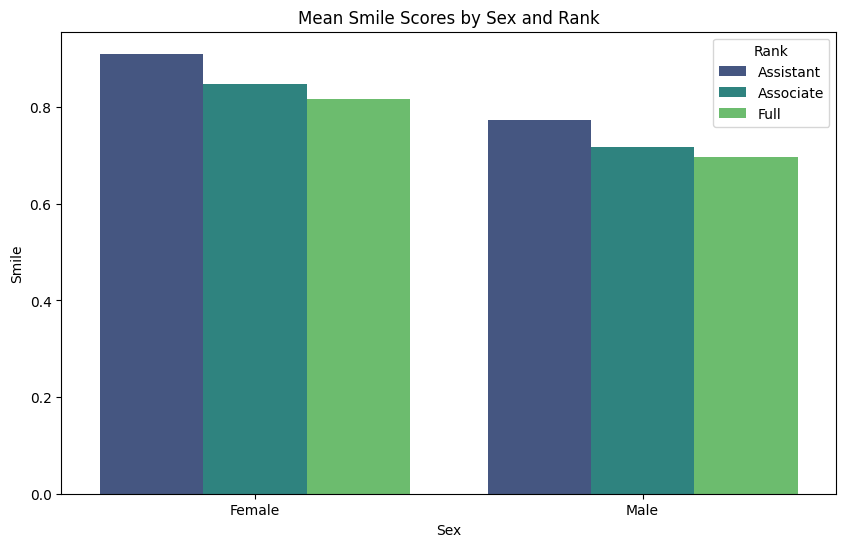

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported pandas and have a DataFrame named df

# Group by "Sex" and "Rank" and calculate the mean sentiment
grouped_data = df_total.groupby(["Sex", "Rank"])["Smile"].mean().reset_index()

# Create a bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Sex", y="Smile", hue="Rank", data=grouped_data, palette="viridis")

# Set plot labels and title
plt.title("Mean Smile Scores by Sex and Rank")

# Show the plot
plt.show()

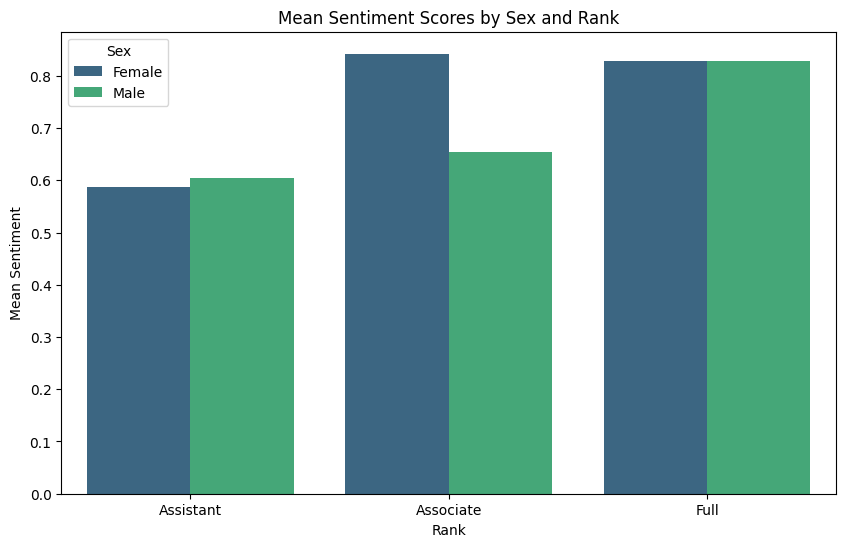

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported pandas and have a DataFrame named df

# Group by "Sex" and "Rank" and calculate the mean sentiment
grouped_data = df_total.groupby(["Sex", "Rank"])["sentiment"].mean().reset_index()

# Create a bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Rank", y="sentiment", hue="Sex", data=grouped_data, palette="viridis")

# Set plot labels and title
plt.title("Mean Sentiment Scores by Sex and Rank")

# Show the plot
plt.show()

In [70]:
df_total.groupby(["Sex", "Rank"])["sentiment"].mean()

Sex     Rank     
Female  Assistant    0.587697
        Associate    0.842348
        Full         0.827984
Male    Assistant    0.605140
        Associate    0.653932
        Full         0.828240
Name: sentiment, dtype: float64

In [75]:
# Two Factor
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Two-way ANOVA
model = ols('sentiment ~ C(Rank) + C(Sex) + C(Rank):C(Sex)', data=df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# Perform Tukey's HSD test for Rank
tukey_results_rank = pairwise_tukeyhsd(df_total["sentiment"], df_total['Rank'])
print("Tukey's HSD for Rank:")
print(tukey_results_rank)
print("\n")

# T test for sex
group1 = df_total[df_total['Sex'] == 'Female']['sentiment']
group2 = df_total[df_total['Sex'] == 'Male']['sentiment']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


                   sum_sq     df          F        PR(>F)
C(Rank)          4.925189    2.0  17.791509  3.535235e-08
C(Sex)           0.119347    1.0   0.862248  3.535810e-01
C(Rank):C(Sex)   0.647248    2.0   2.338086  9.761970e-02
Residual        65.885082  476.0        NaN           NaN



Tukey's HSD for Rank:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower  upper  reject
--------------------------------------------------------
Assistant Associate   0.1239  0.035 0.0069 0.2409   True
Assistant      Full   0.2313    0.0 0.1389 0.3236   True
Associate      Full   0.1074 0.0481 0.0007 0.2141   True
--------------------------------------------------------


T-Statistic: -0.6185814525632279
P-Value: 0.5366840176435017


In [72]:
# ANOVA and TukeyHSD result

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_gender = df_total[df_total["Sex"] == "Female"]

# ANOVA
model = ols('sentiment ~ C(Rank)', data=df_gender).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df_gender["sentiment"], df_gender['Rank'])
print(tukey_results)
print("\n")

# Print the p-values
print(f"Tukey's HSD P-Values: {[round(p, 5) for p in tukey_results.pvalues]}")

             sum_sq     df         F    PR(>F)
C(Rank)    2.236671    2.0  8.326282  0.000376
Residual  19.609833  146.0       NaN       NaN



   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
Assistant Associate   0.2547 0.0038  0.0701 0.4392   True
Assistant      Full   0.2403 0.0019  0.0772 0.4034   True
Associate      Full  -0.0144 0.9834 -0.2098 0.1811  False
---------------------------------------------------------


Tukey's HSD P-Values: [0.00385, 0.00185, 0.98344]


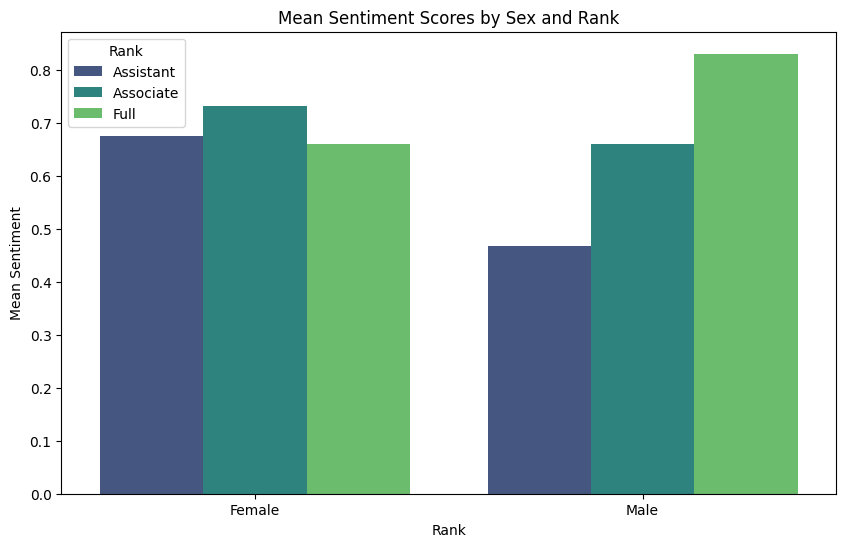

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported pandas and have a DataFrame named df

# Group by "Sex" and "Rank" and calculate the mean sentiment
grouped_data = df_new.groupby(["Sex", "Rank"])["sentiment"].mean().reset_index()

# Create a bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Sex", y="sentiment", hue="Rank", data=grouped_data, palette="viridis")

# Set plot labels and title
plt.xlabel("Rank")
plt.ylabel("Mean Sentiment")
plt.title("Mean Sentiment Scores by Sex and Rank")

# Show the plot
plt.show()
